In [1]:
 # data analysis and wrangling
import pandas as pd
from pandas_datareader import data
import numpy as np
import random as rnd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline


In [2]:
# plotly
import plotly
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()


In [34]:
# set the start date and end date.
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2020,1,1)
# in case you cannot access the data from yahoo finance
BAC = pd.read_csv('../input/banks-historical-stock-price/BAC.csv')
C = pd.read_csv('../input/banks-historical-stock-price/C.csv')
GS = pd.read_csv('../input/banks-historical-stock-price/GS.csv')
JPM = pd.read_csv('../input/banks-historical-stock-price/JPM.csv')
MS = pd.read_csv('../input/banks-historical-stock-price/MS.csv')
WFC = pd.read_csv('../input/banks-historical-stock-price/WFC.csv')

In [35]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)
# bank_stocks

bank_stocks.columns.names = ['Bank Ticker','Stock Info']
# bank_stocks = bank_stocks.set_index('Date')
bank_stocks.head()

Bank Ticker         BAC                                              \
Stock Info         Date       High        Low       Open      Close   
0            2006-01-03  47.180000  46.150002  46.919998  47.080002   
1            2006-01-04  47.240002  46.450001  47.000000  46.580002   
2            2006-01-05  46.830002  46.320000  46.580002  46.639999   
3            2006-01-06  46.910000  46.349998  46.799999  46.570000   
4            2006-01-09  46.970001  46.360001  46.720001  46.599998   

Bank Ticker                                  C                          ...  \
Stock Info       Volume  Adj Close        Date        High         Low  ...   
0            16296700.0  34.811729  2006-01-03  493.799988  481.100006  ...   
1            17757900.0  34.442013  2006-01-04  491.000000  483.500000  ...   
2            14970700.0  34.486385  2006-01-05  487.799988  484.000000  ...   
3            12599800.0  34.434616  2006-01-06  489.000000  482.000000  ...   
4            15619400.0  34.456806  2006-01-09  487.399994  483.000000  ...   

Bank Ticker         MS                               WFC             \
Stock Info       Close     Volume  Adj Close        Date       High   
0            58.310001  5377000.0  36.867344  2006-01-03  31.975000   
1            58.349998  7977800.0  36.892612  2006-01-04  31.820000   
2            58.509998  5778000.0  36.993786  2006-01-05  31.555000   
3            58.570000  6889800.0  37.031731  2006-01-06  31.775000   
4            59.189999  4144500.0  37.423725  2006-01-09  31.825001   

Bank Ticker                                                          
Stock Info         Low       Open      Close      Volume  Adj Close  
0            31.195000  31.600000  31.900000  11016400.0  20.723480  
1            31.365000  31.799999  31.530001  10870000.0  20.483118  
2            31.309999  31.500000  31.495001  10158000.0  20.460379  
3            31.385000  31.580000  31.680000   8403800.0  20.580564  
4            31.555000  31.674999  31.674999   5619600.0  20.577309  

[5 rows x 42 columns]

In [7]:
bank_stocks = bank_stocks.T.drop_duplicates().T
# bank_stocks = bank_stocks.set_index('Date')

bank_stocks.head()

Bank Ticker         BAC                                              \
Stock Info         Date       High        Low       Open      Close   
0            2006-01-03  47.180000  46.150002  46.919998  47.080002   
1            2006-01-04  47.240002  46.450001  47.000000  46.580002   
2            2006-01-05  46.830002  46.320000  46.580002  46.639999   
3            2006-01-06  46.910000  46.349998  46.799999  46.570000   
4            2006-01-09  46.970001  46.360001  46.720001  46.599998   

Bank Ticker                                  C                          ...  \
Stock Info       Volume  Adj Close        High         Low        Open  ...   
0            16296700.0  34.811729  493.799988  481.100006  490.000000  ...   
1            17757900.0  34.442013  491.000000  483.500000  488.600006  ...   
2            14970700.0  34.486385  487.799988  484.000000  484.399994  ...   
3            12599800.0  34.434616  489.000000  482.000000  488.799988  ...   
4            15619400.0  34.456806  487.399994  483.000000  486.000000  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
0            57.169998  58.310001  5377000.0  36.867344  31.975000  31.195000   
1            58.700001  58.349998  7977800.0  36.892612  31.820000  31.365000   
2            58.549999  58.509998  5778000.0  36.993786  31.555000  31.309999   
3            58.770000  58.570000  6889800.0  37.031731  31.775000  31.385000   
4            58.630001  59.189999  4144500.0  37.423725  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
0            31.600000  31.900000  11016400.0  20.723480  
1            31.799999  31.530001  10870000.0  20.483118  
2            31.500000  31.495001  10158000.0  20.460379  
3            31.580000  31.680000   8403800.0  20.580564  
4            31.674999  31.674999   5619600.0  20.577309  

[5 rows x 37 columns]

In [19]:
# index2 = bank_stocks.columns[0][1]
# bank_stocks = bank_stocks.set_index(index2)
# bank_stocks.head()

KeyError: "None of ['Date'] are in the columns"

In [12]:
BAC = BAC.set_index("Date")
BAC.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.811729
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.442013
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.486385
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.434616
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.456806


In [17]:
bank_stocks.columns
bank_stocks
index2 = bank_stocks.columns[0][1]
index2

'Date'

In [36]:
# What is the max Close price for each bank's stock throughout the time period?
# The bank with the highest stock price is Citigroup.


bank_stocks.xs('Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     273.380005
JPM    141.089996
MS      89.300003
WFC     65.930000
dtype: float64

In [53]:
# On what date did Citigroup stock reach its highest price?
#  Date              2006-12-27

highest_price = C['Close'].idxmax()
bank_stocks.iloc[highest_price]


Bank Ticker  Stock Info
BAC          Date              2006-12-27
             High               54.049999
             Low                53.500000
             Open               53.880001
             Close              53.770000
             Volume        8905300.000000
             Adj Close          41.481430
C            Date              2006-12-27
             High              566.700012
             Low               551.200012
             Open              551.200012
             Close             564.099976
             Volume        2235000.000000
             Adj Close         452.458160
GS           Date              2006-12-27
             High              202.289993
             Low               199.720001
             Open              199.860001
             Close             201.949997
             Volume        2887200.000000
             Adj Close         167.907532
JPM          Date              2006-12-27
             High               49.000000
          

In [54]:
# highest_price = C['Close'].idxmax()
#  df.at[dates[0], "A"]
# bank_stocks.loc[highest_price,["Date"]]

In [71]:
# empty dataframe
returns = pd.DataFrame()
returns["Date"] = bank_stocks["BAC"]['Date']
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

returns = returns.set_index("Date")
returns.head(5)

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


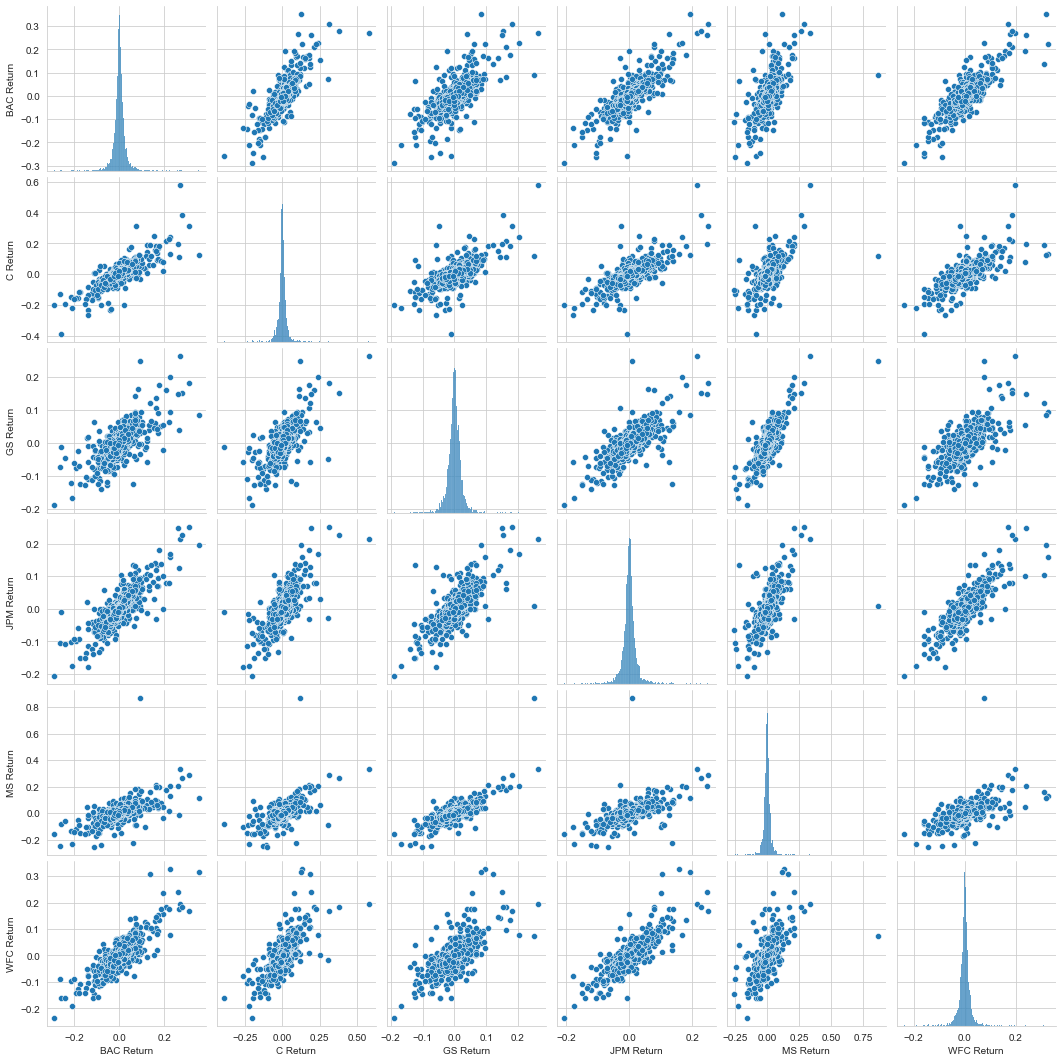

In [72]:
# Is there a stock that stands out?

sns.pairplot(returns[1:])

In [73]:
# Biggest single day losses
returns.idxmin()


BAC Return    2009-01-20
C Return      2009-02-27
GS Return     2009-01-20
JPM Return    2009-01-20
MS Return     2008-10-09
WFC Return    2009-01-20
dtype: object

In [74]:
bank_stocks.loc[697]
returns.iloc[766]
# Date(766)                2009-01-20
# Date (793)               2009-02-27
# Date (697)               2008-10-09

BAC Return   -0.289694
C Return     -0.200000
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.159718
WFC Return   -0.238223
Name: 2009-01-20, dtype: float64

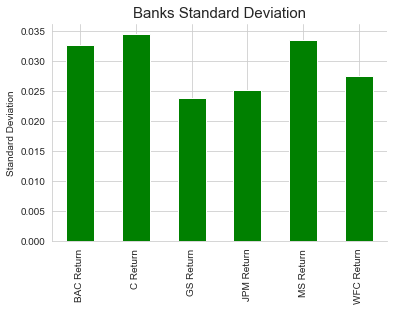

In [75]:
# Which stock would you classify as the riskiest over the entire time period?
# two most riskiest stocks are "Citigroup and Morgan Stanley".
# Standard Deviation 

returns.std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('Banks Standard Deviation', fontsize=15)
sns.despine()

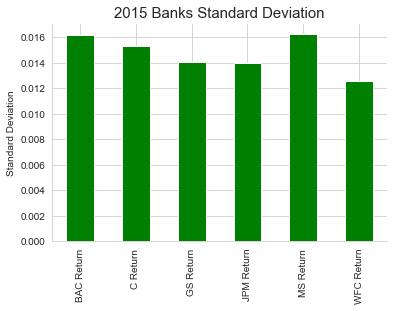

In [76]:
# 2015 Standard Deviation
# Wells Fargo being the lowest risk
returns.loc['2015-01-01':'2015-12-31'].std().plot(kind='bar', color='Green')
plt.ylabel('Standard Deviation')
plt.title('2015 Banks Standard Deviation', fontsize=15)
sns.despine()

c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Numbers of Returns')

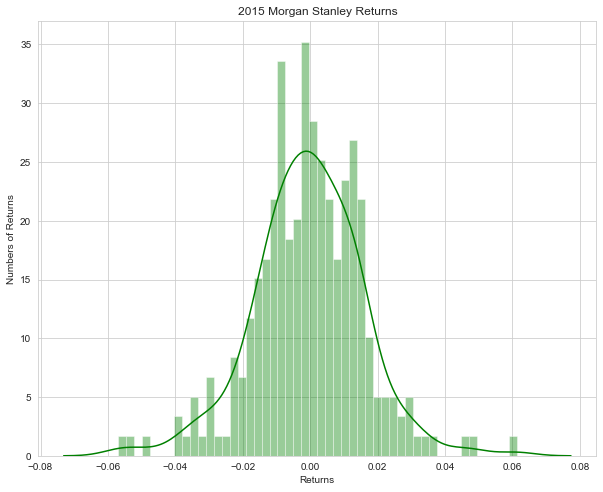

In [77]:
# Create a distplot using seaborn of the 2015 returns for Morgan Stanley.

plt.figure(figsize=(10,8))
ax = sns.distplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], color='green', bins=50)
ax.set_title('2015 Morgan Stanley Returns')
ax.set_xlabel('Returns')
ax.set_ylabel('Numbers of Returns')

c:\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0, 0.5, 'Numbers of Returns')

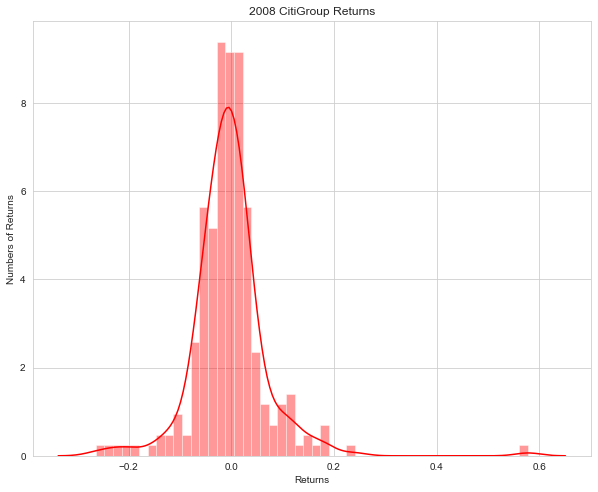

In [78]:
# 2008 CitiGroup Returns

plt.figure(figsize=(10,8))
ax = sns.distplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], color='red', bins=50)
ax.set_title('2008 CitiGroup Returns')
ax.set_xlabel('Returns')
ax.set_ylabel('Numbers of Returns')

# If you look a normal year like 2015, 
# a normal deviation is 0.06 and for CitiGroup in 2008 was 0.6. 
# That is actually 10 times more deviation.